In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_dir = "data/House/"

In [3]:
df = pd.read_csv(file_dir+'train.csv')

In [4]:
dfTemp = pd.read_csv(file_dir+'train.csv')

In [5]:
pd.set_option('display.max_columns', 500)

df.isnull().head(20)

In [6]:
print(df.head(1))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        

In [7]:
df.drop(['Id','Street','Alley','Utilities','PoolArea','Fence','LotConfig','Neighborhood','ScreenPorch','3SsnPorch','Condition1','Condition2','OpenPorchSF','EnclosedPorch','WoodDeckSF','GarageCond','GarageQual','GarageArea','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','ExterCond','ExterQual','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','Functional','FireplaceQu','GarageYrBlt','GarageFinish','MiscFeature','MiscVal','MSSubClass','LotFrontage','LandSlope','RoofStyle','RoofMatl','PavedDrive','LotShape'], axis=1, inplace=True)

In [8]:
dfTemp.drop(['Id','Street','Alley','Utilities','PoolArea','Fence','LotConfig','Neighborhood','ScreenPorch','3SsnPorch','Condition1','Condition2','OpenPorchSF','EnclosedPorch','WoodDeckSF','GarageCond','GarageQual','GarageArea','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','ExterCond','ExterQual','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','Functional','FireplaceQu','GarageYrBlt','GarageFinish','MiscFeature','MiscVal','MSSubClass','LotFrontage','LandSlope','RoofStyle','RoofMatl','PavedDrive','LotShape'], axis=1, inplace=True)

In [9]:
dfTemp[dfTemp.LotArea > 200000]

,MSZoning,LotArea,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,RL,215245,Low,1Fam,1Story,7,5,1965,1965,Y,2,0,TA,8,2,Attchd,2,NaN,6,2009,WD,Normal,375000


In [10]:
print(df.head(1))

  MSZoning  LotArea LandContour BldgType HouseStyle  OverallQual  OverallCond  \
0       RL     8450         Lvl     1Fam     2Story            7            5   

   YearBuilt  YearRemodAdd CentralAir  FullBath  HalfBath KitchenQual  \
0       2003          2003          Y         2         1          Gd   

   TotRmsAbvGrd  Fireplaces GarageType  GarageCars PoolQC  MoSold  YrSold  \
0             8           0     Attchd           2    NaN       2    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  


In [11]:
#df.loc[df['LotShape'] == 1]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
Y = df["SalePrice"].values

In [14]:
print(Y)

[208500 181500 223500 ... 266500 142125 147500]


0 = C (all)
1 = FV
2 = RH
3 = RL
4 = RM

In [15]:
df["MSZoning"] = df["MSZoning"].astype("category").cat.codes

0 = Bnk
1 = HLS
2 = Low
3 = Lvl

In [16]:
df["LandContour"] = df["LandContour"].astype("category").cat.codes

In [17]:
print(df.head(1))

   MSZoning  LotArea  LandContour BldgType HouseStyle  OverallQual  \
0         3     8450            3     1Fam     2Story            7   

   OverallCond  YearBuilt  YearRemodAdd CentralAir  FullBath  HalfBath  \
0            5       2003          2003          Y         2         1   

  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageCars PoolQC  MoSold  \
0          Gd             8           0     Attchd           2    NaN       2   

   YrSold SaleType SaleCondition  SalePrice  
0    2008       WD        Normal     208500  


In [18]:
print(df.head(1))

   MSZoning  LotArea  LandContour BldgType HouseStyle  OverallQual  \
0         3     8450            3     1Fam     2Story            7   

   OverallCond  YearBuilt  YearRemodAdd CentralAir  FullBath  HalfBath  \
0            5       2003          2003          Y         2         1   

  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageCars PoolQC  MoSold  \
0          Gd             8           0     Attchd           2    NaN       2   

   YrSold SaleType SaleCondition  SalePrice  
0    2008       WD        Normal     208500  


In [31]:
dfTemp.loc[dfTemp['LotArea'] > 200000]

,MSZoning,LotArea,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,RL,215245,Low,1Fam,1Story,7,5,1965,1965,Y,2,0,TA,8,2,Attchd,2,NaN,6,2009,WD,Normal,375000


In [33]:
dfTemp.drop(dfTemp.index[313])

,MSZoning,LotArea,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,8450,Lvl,1Fam,2Story,7,5,2003,2003,Y,2,1,Gd,8,0,Attchd,2,NaN,2,2008,WD,Normal,208500
1,RL,9600,Lvl,1Fam,1Story,6,8,1976,1976,Y,2,0,TA,6,1,Attchd,2,NaN,5,2007,WD,Normal,181500
2,RL,11250,Lvl,1Fam,2Story,7,5,2001,2002,Y,2,1,Gd,6,1,Attchd,2,NaN,9,2008,WD,Normal,223500
3,RL,9550,Lvl,1Fam,2Story,7,5,1915,1970,Y,1,0,Gd,7,1,Detchd,3,NaN,2,2006,WD,Abnorml,140000
4,RL,14260,Lvl,1Fam,2Story,8,5,2000,2000,Y,2,1,Gd,9,1,Attchd,3,NaN,12,2008,WD,Normal,250000
5,RL,14115,Lvl,1Fam,1.5Fin,5,5,1993,1995,Y,1,1,TA,5,0,Attchd,2,NaN,10,2009,WD,Normal,143000
6,RL,10084,Lvl,1Fam,1Story,8,5,2004,2005,Y,2,0,Gd,7,1,Attchd,2,NaN,8,2007,WD,Normal,307000
7,RL,10382,Lvl,1Fam,2Story,7,6,1973,1973,Y,2,1,TA,7,2,Attchd,2,NaN,11,2009,WD,Normal,200000
8,RM,6120,Lvl,1Fam,1.5Fin,7,5,1931,1950,Y,2,0,TA,8,2,Detchd,2,NaN,4,2008,WD,Abnorml,129900
9,RL,7420,Lvl,2fmCon,1.5Unf,5,6,1939,1950,Y,1,0,TA,5,2,Attchd,1,NaN,1,2008,WD,Normal,118000


In [32]:
dfTemp.loc[dfTemp['LotArea'] > 200000]

,MSZoning,LotArea,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,RL,215245,Low,1Fam,1Story,7,5,1965,1965,Y,2,0,TA,8,2,Attchd,2,NaN,6,2009,WD,Normal,375000


In [29]:
dfTemp[dfTemp.index[313]])

KeyError: 313

In [21]:
#(dfTemp[dfTemp.LotArea > 200000]).drop

In [25]:
dfTemp.loc[dfTemp['LotArea'] > 200000]

,MSZoning,LotArea,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,PoolQC,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,RL,215245,Low,1Fam,1Story,7,5,1965,1965,Y,2,0,TA,8,2,Attchd,2,NaN,6,2009,WD,Normal,375000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f575e5b2b70>]],
      dtype=object)

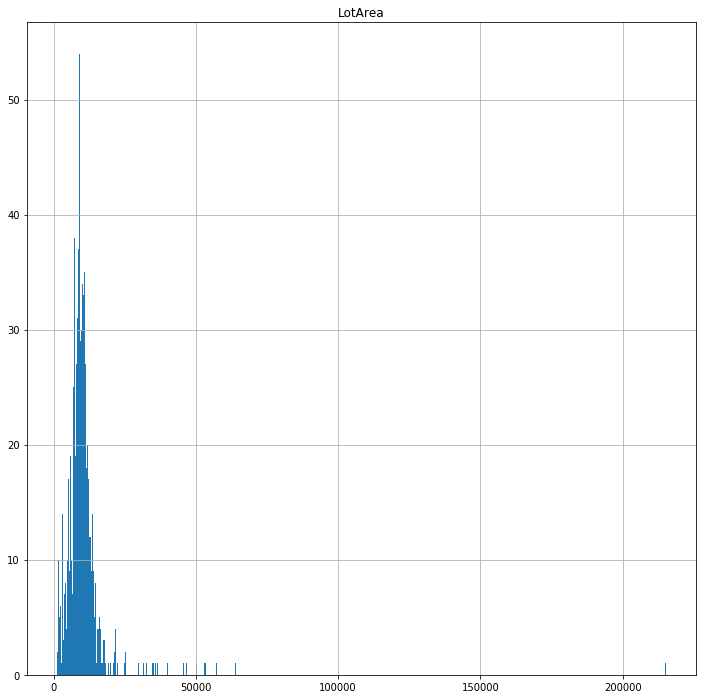

In [23]:
dfTemp.hist(column='LotArea', bins=1200, figsize=(12,12))